# Dual Momentum GEM
    
    (optimize lookback)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbols = {'SP500' : 'SPY',  'BONDS' : 'AGG', 'EXUS' : 'EFA', 'T-BILL': 'BIL'}

capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

# num months lookback
lookback = None

use_cache = True

Define Optimizations

In [4]:
# pick one
optimize_lookback = True

# define high low trade periods ranges
if optimize_lookback:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_lookback:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, lookback=int(X),
                                          margin=1, use_cache=True, use_absolute_mom = True)
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,9.70,6.53,8.86,5.88,6.44,5.59,5.42,4.79,6.38,6.65,5.59,7.33,7.38,12.23,10.46,8.86
max_closed_out_drawdown,-21.72,-33.64,-33.53,-33.47,-35.43,-35.27,-33.81,-35.20,-33.71,-35.27,-33.42,-33.54,-33.69,-33.62,-33.58,-33.55
drawdown_annualized_return,-2.24,-5.15,-3.78,-5.70,-5.50,-6.31,-6.24,-7.34,-5.28,-5.30,-5.97,-4.58,-4.56,-2.75,-3.21,-3.79
drawdown_recovery,-0.68,-0.09,-0.09,-0.09,-1.51,-1.51,-1.51,-1.51,-0.09,-1.51,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09
best_month,16.54,16.50,16.52,16.53,16.53,16.53,12.53,12.52,12.72,12.70,12.57,14.07,14.16,22.98,14.16,12.64
worst_month,-15.96,-30.91,-30.81,-30.76,-30.82,-30.71,-30.60,-30.60,-30.98,-30.97,-30.71,-30.83,-30.96,-30.90,-30.86,-30.83
sharpe_ratio,0.74,0.50,0.65,0.46,0.48,0.43,0.42,0.38,0.47,0.48,0.42,0.52,0.52,0.78,0.70,0.61
sortino_ratio,0.88,0.56,0.72,0.52,0.53,0.48,0.47,0.42,0.53,0.54,0.48,0.58,0.59,0.91,0.80,0.70
monthly_std,3.37,3.65,3.61,3.65,3.85,3.87,3.76,3.84,3.75,3.96,3.80,3.91,3.91,4.03,3.91,3.90
pct_time_in_market,95.04,95.11,96.64,97.17,98.60,97.27,97.21,97.31,98.04,99.30,99.30,99.30,99.24,99.93,99.93,99.93


Bar graphs

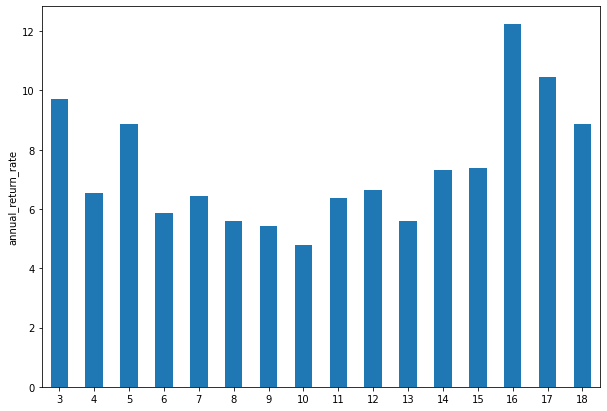

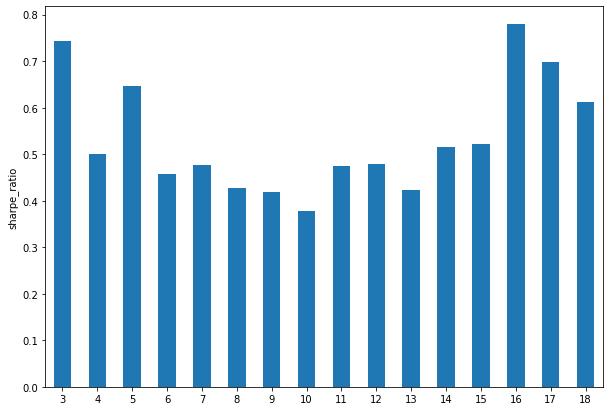

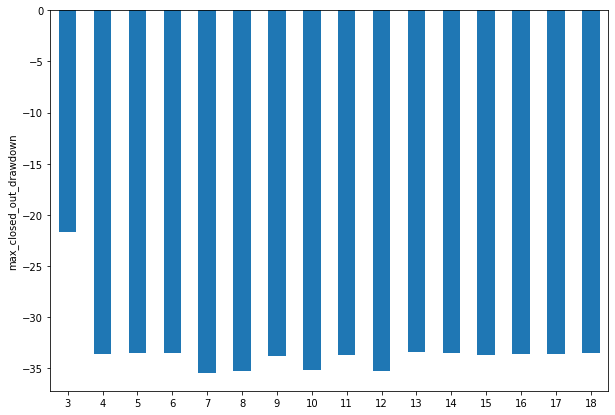

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2008-10-30 00:00:00 BUY  132 SPY @ 75.36
2020-10-16 00:00:00 SELL 132 SPY @ 347.29


Equity curve

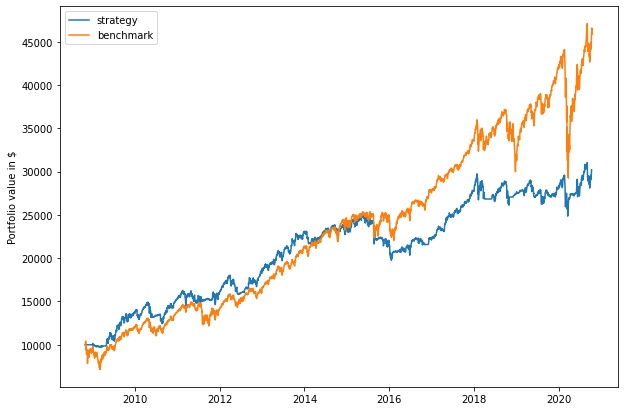

In [9]:
if optimize_lookback: Y = '3'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [10]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.lookback)

    plt.legend(loc='best')

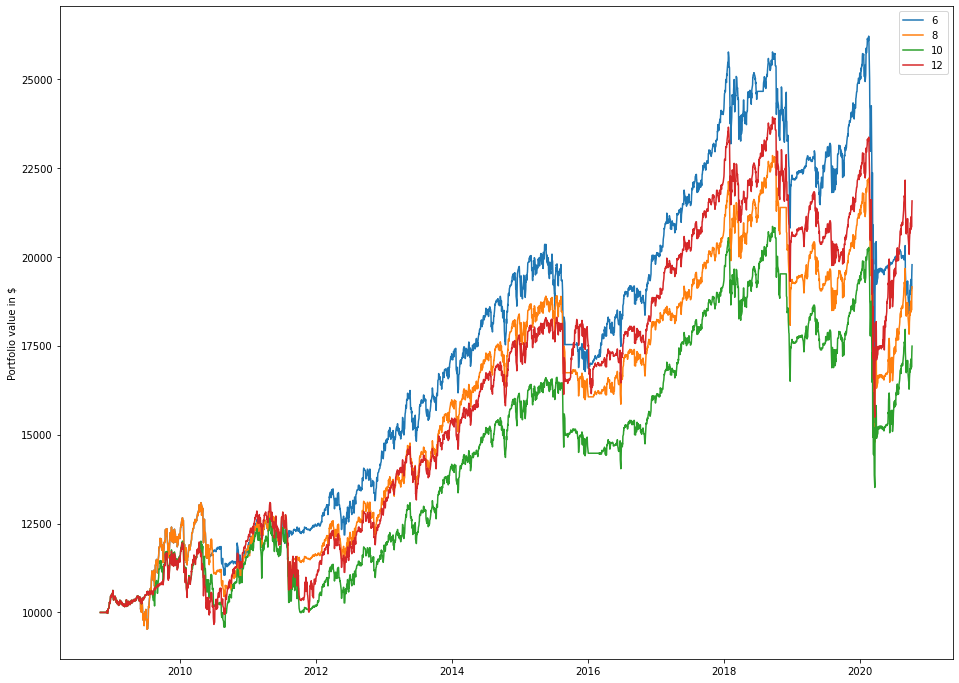

In [11]:
plot_equity_curves(strategies[3:10:2])